My time:  [0.005511760711669922, 0.01167917251586914, 0.01744246482849121, 0.022669076919555664, 0.02818918228149414]
Lib time:  [0, 0, 0, 0, 0]


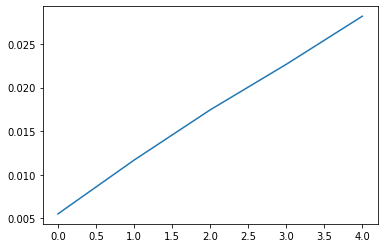

In [8]:
import numpy as np
import time
import matplotlib.pyplot as plt
from scipy.linalg import solve_banded

###### Метод Гаусса ########
def gauss(A, f):
    n = f.size
    x = np.zeros(n)

    for k in range(n):
        f[k] = f[k] / A[k][k]
        A[k] = A[k] / A[k][k]
        for i in range(k + 1, n):
            f[i] = f[i] - f[k] * A[i][k]
            A[i] = A[i] - A[k] * A[i][k]
            A[i][k] = 0
              
    for i in range(n - 1, -1, -1):
        x[i] = f[i]
        for j in range(i + 1, n):
            x[i] = x[i] - A[i][j] * x[j]

    return x
    
############ Прогонка #################
def sweep (a, b, c, f):
    n = f.size
    
    alpha = [0] * (n+1)
    betta = [0] * (n+1)
    x = [0] * (n+1)
    a[0] = 0
    c[n-1] = 0
    alpha[0] = 0
    betta[0] = 0
    
    for i in range(n):
        d = a[i] * alpha[i] + b[i]
        alpha[i+1] = -c[i] / d
        betta[i+1] = (f[i] - a[i] * betta[i]) / d
        
    x[n] = 0
    for i in range(n-1, -1, -1):
        x[i] = alpha[i+1] * x[i+1] + betta[i+1]

    return x

########## Проверка метода Гаусса ###############
def check_gauss():
    n = 5
    my_time = [0] * n
    lib_time = [0] * n

    for i in range(0, n):
        A = np.random.rand(100 * (i+1), 100 * (i+1))
        f = np.random.rand(100 * (i+1))

        start_time = time.time()
        x = np.linalg.solve(A, f)
        end_time = time.time()
        lib_time[i] = end_time - start_time
    
        start_time = time.time()
        x = gauss(A, f)
        end_time = time.time()
        my_time[i] = end_time - start_time
    
    print('My time: ', my_time)
    print('lib_time: ', lib_time)

    plt.plot(my_time)
    plt.plot(lib_time)
    plt.show()
    
    
############ Проверка прогонки ##############
def check_sweep():
    n = 5
    my_time = [0] * n
    lib_time = [0] * n

    for i in range(0, n):
        size = 1000 * (i+1)
        a = np.random.rand(size)
        b = np.random.rand(size)
        c = np.random.rand(size)
        f = np.random.rand(size)
        
        A = np.zeros((size, size))
        for j in range(size):
            A[j][j] = b[j]
            if j != size-1:
                A[j+1][j] = a[j+1]
                A[j][j+1] = c[j]
                
        start_time = time.time()
        x = sweep(a, b, c, f)
        end_time = time.time()
        my_time[i] = end_time - start_time
    
    print('My time: ', my_time)
    print('Lib time: ', lib_time)

    plt.plot(my_time)
    plt.show()
    
    

check_sweep()

In [9]:
import numpy as np
from math import sqrt

def cholesky(A):
    n = A.size
    U = np.zeros((n, n))
    sum1 = 0
    sum2 = 0
    
    for i in range(n):
        if i != 0:
            sum1 += U[i-1][i] ** 2
        U[i][i] = sqrt(A[i][i] - sum1)

        for j in range(i+1, n):
            sum2 = 0
            for k in range(i-1):
                sum2 += U[k][i] * U[k][j]
            U[i][j] = (A[i][j] - sum2) / U[i][i]
    
    return U
    
A = np.array([[1, 2, 3], [2, 3, 4], [5, 6, 2]])
U = cholesky(A)

IndexError: index 3 is out of bounds for axis 0 with size 3